In [1]:
import IJulia
import Base64

# The julia kernel has built in support for Revise.jl, so this is the 
# recommended approach for long-running sessions:
# https://github.com/JuliaLang/IJulia.jl/blob/9b10fa9b879574bbf720f5285029e07758e50a5e/src/kernel.jl#L46-L51

# Users should enable revise within .julia/config/startup_ijulia.jl:
# https://timholy.github.io/Revise.jl/stable/config/#Using-Revise-automatically-within-Jupyter/IJulia-1

# clear console history
IJulia.clear_history()

fig_width = 5.5
fig_height = 3.5
fig_format = :svg
fig_dpi = 96

# no retina format type, use svg for high quality type/marks
if fig_format == :retina
  fig_format = :svg
elseif fig_format == :pdf
  fig_dpi = 96
  # Enable PDF support for IJulia
  IJulia.register_mime(MIME("application/pdf"))
end

# convert inches to pixels
fig_width = fig_width * fig_dpi
fig_height = fig_height * fig_dpi

# Intialize Plots w/ default fig width/height
try
  import Plots

  # Plots.jl doesn't support PDF output for versions < 1.28.1
  # so use png (if the DPI remains the default of 300 then set to 96)
  if (Plots._current_plots_version < v"1.28.1") & (fig_format == :pdf)
    Plots.gr(size=(fig_width, fig_height), fmt = :png, dpi = fig_dpi)
  else
    Plots.gr(size=(fig_width, fig_height), fmt = fig_format, dpi = fig_dpi)
  end
catch e
  # @warn "Plots init" exception=(e, catch_backtrace())
end

# Initialize CairoMakie with default fig width/height
try
  import CairoMakie

  # CairoMakie's display() in PDF format opens an interactive window
  # instead of saving to the ipynb file, so we don't do that.
  # https://github.com/quarto-dev/quarto-cli/issues/7548
  if fig_format == :pdf
    CairoMakie.activate!(type = "png")
  else
    CairoMakie.activate!(type = string(fig_format))
  end
  CairoMakie.update_theme!(resolution=(fig_width, fig_height))
catch e
    # @warn "CairoMakie init" exception=(e, catch_backtrace())
end
  
# Set run_path if specified
try
  run_path = "L1VzZXJzL2NmYTUyMjgvRG9jdW1lbnRzL1JlcG9zL091dGJyZWFrRGV0ZWN0aW9uL21hbnVzY3JpcHQ="
  if !isempty(run_path)
    run_path = String(Base64.base64decode(run_path))
    cd(run_path)
  end
catch e
  @warn "Run path init:" exception=(e, catch_backtrace())
end


# emulate old Pkg.installed beahvior, see
# https://discourse.julialang.org/t/how-to-use-pkg-dependencies-instead-of-pkg-installed/36416/9
import Pkg
function isinstalled(pkg::String)
  any(x -> x.name == pkg && x.is_direct_dep, values(Pkg.dependencies()))
end

# ojs_define
if isinstalled("JSON") && isinstalled("DataFrames")
  import JSON, DataFrames
  global function ojs_define(; kwargs...)
    convert(x) = x
    convert(x::DataFrames.AbstractDataFrame) = Tables.rows(x)
    content = Dict("contents" => [Dict("name" => k, "value" => convert(v)) for (k, v) in kwargs])
    tag = "<script type='ojs-define'>$(JSON.json(content))</script>"
    IJulia.display(MIME("text/html"), tag)
  end
elseif isinstalled("JSON")
  import JSON
  global function ojs_define(; kwargs...)
    content = Dict("contents" => [Dict("name" => k, "value" => v) for (k, v) in kwargs])
    tag = "<script type='ojs-define'>$(JSON.json(content))</script>"
    IJulia.display(MIME("text/html"), tag)
  end
else
  global function ojs_define(; kwargs...)
    @warn "JSON package not available. Please install the JSON.jl package to use ojs_define."
  end
end


# don't return kernel dependencies (b/c Revise should take care of dependencies)
nothing


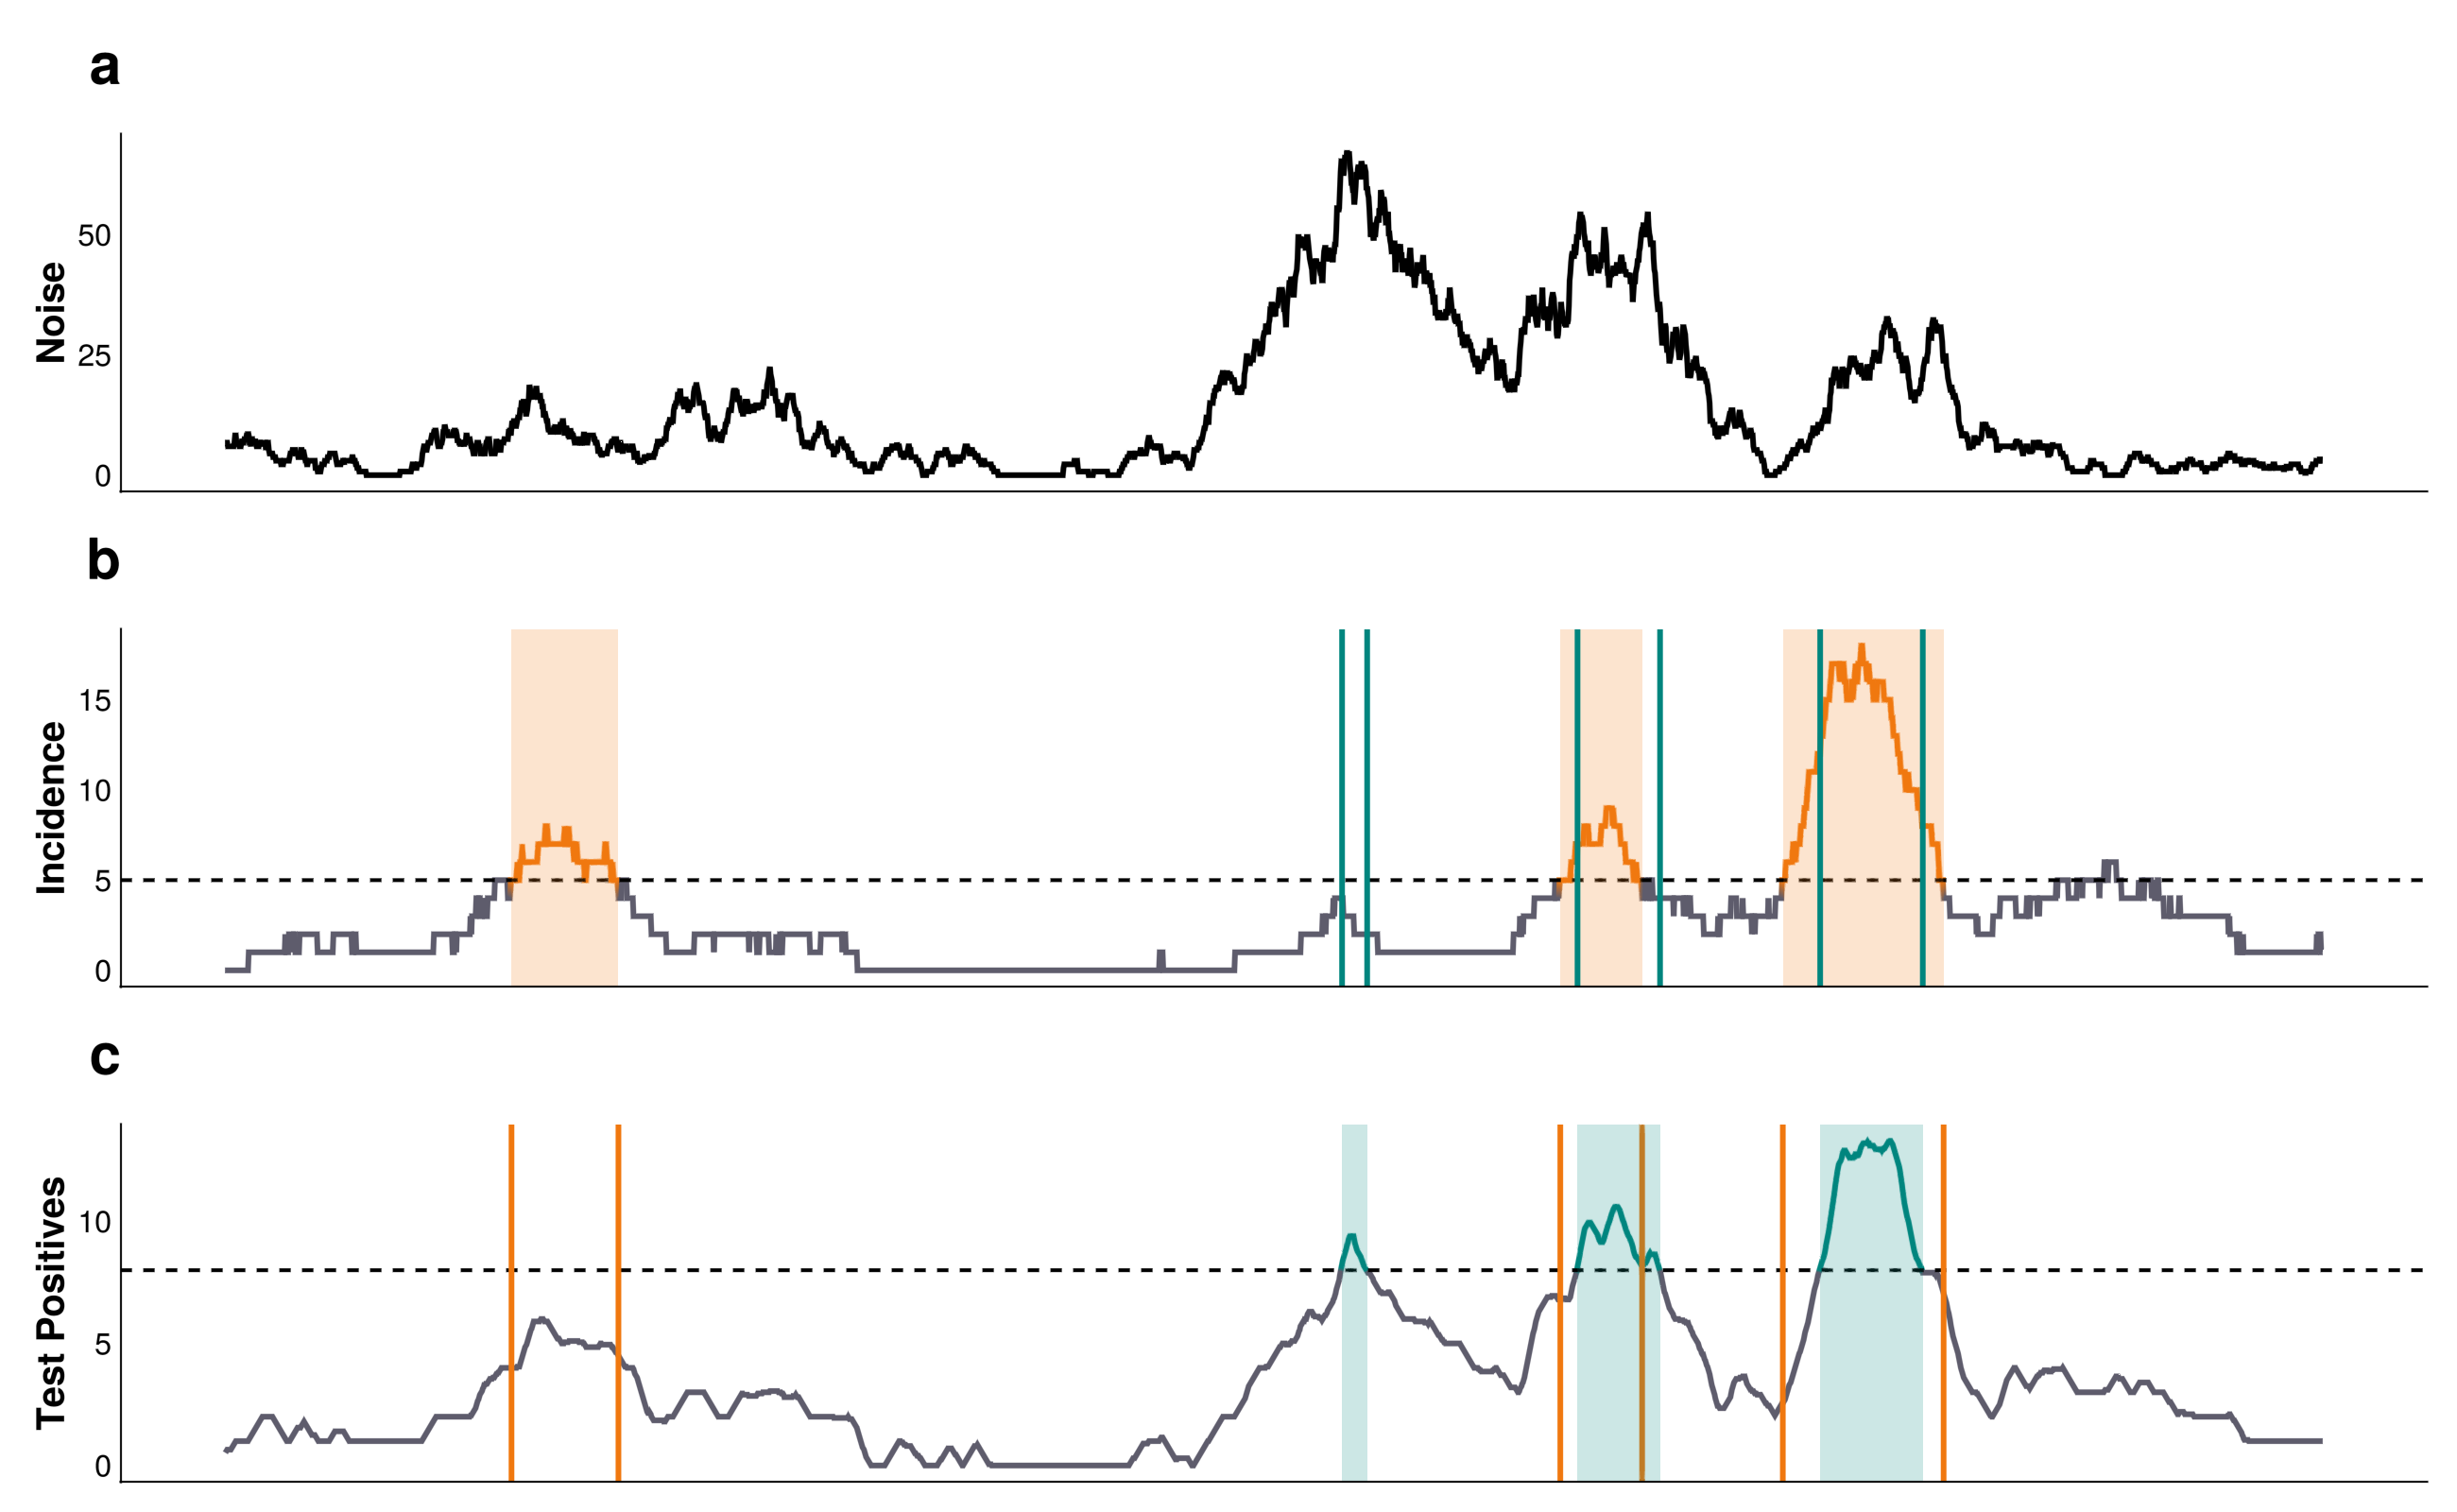

In [2]:
#| fig-cap: A schematic of the outbreak definition and alert detection system. A) Noise time series. B) Measles incidence time series. C) Observed time series resulting from testing noise & measles cases that visit the healthcare facility. The orange bands/vertical lines represent regions of the measles time series that meet the outbreak definition criteria. The green bands/vertical lines represent regions of the observed (measles - noise) time series that breach the alert threshold (the horizontal dashed line), and constitute an alert.
#| label: fig-outbreak-schematic
include("schematic-plot.jl")

In [3]:
#| echo: false
include("optimal-thresholds-tables.jl");

Progress:   8%|███▍                                     |  ETA: 0:00:04

Progress:  12%|█████▏                                   |  ETA: 0:00:03

Progress:  17%|██████▉                                  |  ETA: 0:00:04

Progress:  21%|████████▌                                |  ETA: 0:00:03

Progress:  25%|██████████▎                              |  ETA: 0:00:03

Progress:  29%|████████████                             |  ETA: 0:00:03

Progress:  33%|█████████████▋                           |  ETA: 0:00:03

Progress:  38%|███████████████▍                         |  ETA: 0:00:02

Progress:  42%|█████████████████▏                       |  ETA: 0:00:02

Progress:  46%|██████████████████▊                      |  ETA: 0:00:02

Progress:  50%|████████████████████▌                    |  ETA: 0:00:02

Progress:  54%|██████████████████████▎                  |  ETA: 0:00:02

Progress:  58%|███████████████████████▉                 |  ETA: 0:00:02

Progress:  62%|█████████████████████████▋               |  ETA: 0:00:02

Progress:  67%|███████████████████████████▍             |  ETA: 0:00:01

Progress:  71%|█████████████████████████████            |  ETA: 0:00:01

Progress:  75%|██████████████████████████████▊          |  ETA: 0:00:01

Progress:  79%|████████████████████████████████▌        |  ETA: 0:00:01

Progress:  83%|██████████████████████████████████▏      |  ETA: 0:00:01

Progress:  88%|███████████████████████████████████▉     |  ETA: 0:00:01

Progress:  92%|█████████████████████████████████████▋   |  ETA: 0:00:00

Progress:  96%|███████████████████████████████████████▎ |  ETA: 0:00:00

Progress: 100%|█████████████████████████████████████████| Time: 0:00:04


Progress:   8%|███▍                                     |  ETA: 0:00:03

Progress:  12%|█████▏                                   |  ETA: 0:00:03

Progress:  17%|██████▉                                  |  ETA: 0:00:03

Progress:  21%|████████▌                                |  ETA: 0:00:04

Progress:  25%|██████████▎                              |  ETA: 0:00:04

Progress:  29%|████████████                             |  ETA: 0:00:03

Progress:  33%|█████████████▋                           |  ETA: 0:00:03

Progress:  38%|███████████████▍                         |  ETA: 0:00:03

Progress:  42%|█████████████████▏                       |  ETA: 0:00:02

Progress:  46%|██████████████████▊                      |  ETA: 0:00:02

Progress:  50%|████████████████████▌                    |  ETA: 0:00:02

Progress:  54%|██████████████████████▎                  |  ETA: 0:00:02

Progress:  58%|███████████████████████▉                 |  ETA: 0:00:02

Progress:  62%|█████████████████████████▋               |  ETA: 0:00:02

Progress:  67%|███████████████████████████▍             |  ETA: 0:00:01

Progress:  71%|█████████████████████████████            |  ETA: 0:00:01

Progress:  75%|██████████████████████████████▊          |  ETA: 0:00:01

Progress:  79%|████████████████████████████████▌        |  ETA: 0:00:01

Progress:  83%|██████████████████████████████████▏      |  ETA: 0:00:01

Progress:  88%|███████████████████████████████████▉     |  ETA: 0:00:01

Progress:  92%|█████████████████████████████████████▋   |  ETA: 0:00:00

Progress:  96%|███████████████████████████████████████▎ |  ETA: 0:00:00

Progress: 100%|█████████████████████████████████████████| Time: 0:00:04


Progress:   8%|███▍                                     |  ETA: 0:00:03

Progress:  12%|█████▏                                   |  ETA: 0:00:03

Progress:  17%|██████▉                                  |  ETA: 0:00:03

Progress:  21%|████████▌                                |  ETA: 0:00:03

Progress:  25%|██████████▎                              |  ETA: 0:00:03

Progress:  29%|████████████                             |  ETA: 0:00:03

Progress:  33%|█████████████▋                           |  ETA: 0:00:02

Progress:  38%|███████████████▍                         |  ETA: 0:00:02

Progress:  42%|█████████████████▏                       |  ETA: 0:00:02

Progress:  46%|██████████████████▊                      |  ETA: 0:00:02

Progress:  50%|████████████████████▌                    |  ETA: 0:00:02

Progress:  54%|██████████████████████▎                  |  ETA: 0:00:02

Progress:  58%|███████████████████████▉                 |  ETA: 0:00:01

Progress:  62%|█████████████████████████▋               |  ETA: 0:00:01

Progress:  67%|███████████████████████████▍             |  ETA: 0:00:01

Progress:  71%|█████████████████████████████            |  ETA: 0:00:01

Progress:  75%|██████████████████████████████▊          |  ETA: 0:00:01

Progress:  79%|████████████████████████████████▌        |  ETA: 0:00:01

Progress:  83%|██████████████████████████████████▏      |  ETA: 0:00:01

Progress:  88%|███████████████████████████████████▉     |  ETA: 0:00:01

Progress:  92%|█████████████████████████████████████▋   |  ETA: 0:00:00

Progress:  96%|███████████████████████████████████████▎ |  ETA: 0:00:00

Progress: 100%|█████████████████████████████████████████| Time: 0:00:04


Progress:   8%|███▍                                     |  ETA: 0:00:04

Progress:  12%|█████▏                                   |  ETA: 0:00:03

Progress:  17%|██████▉                                  |  ETA: 0:00:03

Progress:  21%|████████▌                                |  ETA: 0:00:03

Progress:  25%|██████████▎                              |  ETA: 0:00:03

Progress:  29%|████████████                             |  ETA: 0:00:02

Progress:  33%|█████████████▋                           |  ETA: 0:00:02

Progress:  38%|███████████████▍                         |  ETA: 0:00:02

Progress:  42%|█████████████████▏                       |  ETA: 0:00:02

Progress:  46%|██████████████████▊                      |  ETA: 0:00:02

Progress:  50%|████████████████████▌                    |  ETA: 0:00:02

Progress:  54%|██████████████████████▎                  |  ETA: 0:00:02

Progress:  58%|███████████████████████▉                 |  ETA: 0:00:01

Progress:  62%|█████████████████████████▋               |  ETA: 0:00:01

Progress:  67%|███████████████████████████▍             |  ETA: 0:00:01

Progress:  71%|█████████████████████████████            |  ETA: 0:00:01

Progress:  75%|██████████████████████████████▊          |  ETA: 0:00:01

Progress:  79%|████████████████████████████████▌        |  ETA: 0:00:01

Progress:  83%|██████████████████████████████████▏      |  ETA: 0:00:01

Progress:  88%|███████████████████████████████████▉     |  ETA: 0:00:00

Progress:  92%|█████████████████████████████████████▋   |  ETA: 0:00:00

Progress:  96%|███████████████████████████████████████▎ |  ETA: 0:00:00

Progress: 100%|█████████████████████████████████████████| Time: 0:00:03


Progress:   8%|███▍                                     |  ETA: 0:00:03

Progress:  12%|█████▏                                   |  ETA: 0:00:03

Progress:  17%|██████▉                                  |  ETA: 0:00:03

Progress:  21%|████████▌                                |  ETA: 0:00:03

Progress:  25%|██████████▎                              |  ETA: 0:00:02

Progress:  29%|████████████                             |  ETA: 0:00:02

Progress:  33%|█████████████▋                           |  ETA: 0:00:02

Progress:  38%|███████████████▍                         |  ETA: 0:00:02

Progress:  42%|█████████████████▏                       |  ETA: 0:00:02

Progress:  46%|██████████████████▊                      |  ETA: 0:00:02

Progress:  50%|████████████████████▌                    |  ETA: 0:00:02

Progress:  54%|██████████████████████▎                  |  ETA: 0:00:01

Progress:  58%|███████████████████████▉                 |  ETA: 0:00:01

Progress:  62%|█████████████████████████▋               |  ETA: 0:00:01

Progress:  67%|███████████████████████████▍             |  ETA: 0:00:01

Progress:  71%|█████████████████████████████            |  ETA: 0:00:01

Progress:  75%|██████████████████████████████▊          |  ETA: 0:00:01

Progress:  83%|██████████████████████████████████▏      |  ETA: 0:00:01

Progress:  88%|███████████████████████████████████▉     |  ETA: 0:00:00

Progress:  92%|█████████████████████████████████████▋   |  ETA: 0:00:00

Progress:  96%|███████████████████████████████████████▎ |  ETA: 0:00:00

Progress: 100%|█████████████████████████████████████████| Time: 0:00:03


Progress:   8%|███▍                                     |  ETA: 0:00:03

Progress:  12%|█████▏                                   |  ETA: 0:00:03

Progress:  17%|██████▉                                  |  ETA: 0:00:03

Progress:  21%|████████▌                                |  ETA: 0:00:03

Progress:  25%|██████████▎                              |  ETA: 0:00:03

Progress:  29%|████████████                             |  ETA: 0:00:02

Progress:  33%|█████████████▋                           |  ETA: 0:00:02

Progress:  38%|███████████████▍                         |  ETA: 0:00:02

Progress:  42%|█████████████████▏                       |  ETA: 0:00:02

Progress:  46%|██████████████████▊                      |  ETA: 0:00:02

Progress:  50%|████████████████████▌                    |  ETA: 0:00:02

Progress:  54%|██████████████████████▎                  |  ETA: 0:00:01

Progress:  58%|███████████████████████▉                 |  ETA: 0:00:01

Progress:  62%|█████████████████████████▋               |  ETA: 0:00:01

Progress:  67%|███████████████████████████▍             |  ETA: 0:00:01

Progress:  71%|█████████████████████████████            |  ETA: 0:00:01

Progress:  75%|██████████████████████████████▊          |  ETA: 0:00:01

Progress:  79%|████████████████████████████████▌        |  ETA: 0:00:01

Progress:  83%|██████████████████████████████████▏      |  ETA: 0:00:01

Progress:  88%|███████████████████████████████████▉     |  ETA: 0:00:00

Progress:  92%|█████████████████████████████████████▋   |  ETA: 0:00:00

Progress:  96%|███████████████████████████████████████▎ |  ETA: 0:00:00

Progress: 100%|█████████████████████████████████████████| Time: 0:00:03


Progress:   8%|███▍                                     |  ETA: 0:00:02

Progress:  12%|█████▏                                   |  ETA: 0:00:02

Progress:  17%|██████▉                                  |  ETA: 0:00:02

Progress:  21%|████████▌                                |  ETA: 0:00:02

Progress:  25%|██████████▎                              |  ETA: 0:00:02

Progress:  29%|████████████                             |  ETA: 0:00:02

Progress:  33%|█████████████▋                           |  ETA: 0:00:02

Progress:  38%|███████████████▍                         |  ETA: 0:00:02

Progress:  42%|█████████████████▏                       |  ETA: 0:00:02

Progress:  46%|██████████████████▊                      |  ETA: 0:00:02

Progress:  50%|████████████████████▌                    |  ETA: 0:00:02

Progress:  58%|███████████████████████▉                 |  ETA: 0:00:01

Progress:  62%|█████████████████████████▋               |  ETA: 0:00:01

Progress:  67%|███████████████████████████▍             |  ETA: 0:00:01

Progress:  71%|█████████████████████████████            |  ETA: 0:00:01

Progress:  75%|██████████████████████████████▊          |  ETA: 0:00:01

Progress:  79%|████████████████████████████████▌        |  ETA: 0:00:01

Progress:  83%|██████████████████████████████████▏      |  ETA: 0:00:01

Progress:  88%|███████████████████████████████████▉     |  ETA: 0:00:00

Progress:  92%|█████████████████████████████████████▋   |  ETA: 0:00:00

Progress:  96%|███████████████████████████████████████▎ |  ETA: 0:00:00

Progress: 100%|█████████████████████████████████████████| Time: 0:00:03


Progress:   8%|███▍                                     |  ETA: 0:00:02

Progress:  12%|█████▏                                   |  ETA: 0:00:02

Progress:  17%|██████▉                                  |  ETA: 0:00:02

Progress:  21%|████████▌                                |  ETA: 0:00:02

Progress:  25%|██████████▎                              |  ETA: 0:00:02

Progress:  29%|████████████                             |  ETA: 0:00:02

Progress:  33%|█████████████▋                           |  ETA: 0:00:02

Progress:  38%|███████████████▍                         |  ETA: 0:00:02

Progress:  42%|█████████████████▏                       |  ETA: 0:00:02

Progress:  46%|██████████████████▊                      |  ETA: 0:00:02

Progress:  50%|████████████████████▌                    |  ETA: 0:00:02

Progress:  54%|██████████████████████▎                  |  ETA: 0:00:01

Progress:  58%|███████████████████████▉                 |  ETA: 0:00:01

Progress:  62%|█████████████████████████▋               |  ETA: 0:00:01

Progress:  67%|███████████████████████████▍             |  ETA: 0:00:01

Progress:  71%|█████████████████████████████            |  ETA: 0:00:01

Progress:  75%|██████████████████████████████▊          |  ETA: 0:00:01

Progress:  79%|████████████████████████████████▌        |  ETA: 0:00:01

Progress:  83%|██████████████████████████████████▏      |  ETA: 0:00:01

Progress:  88%|███████████████████████████████████▉     |  ETA: 0:00:00

Progress:  92%|█████████████████████████████████████▋   |  ETA: 0:00:00

Progress:  96%|███████████████████████████████████████▎ |  ETA: 0:00:00

Progress: 100%|█████████████████████████████████████████| Time: 0:00:03


Progress:   8%|███▍                                     |  ETA: 0:00:03

Progress:  12%|█████▏                                   |  ETA: 0:00:03

Progress:  17%|██████▉                                  |  ETA: 0:00:03

Progress:  21%|████████▌                                |  ETA: 0:00:03

Progress:  25%|██████████▎                              |  ETA: 0:00:03

Progress:  33%|█████████████▋                           |  ETA: 0:00:02

Progress:  38%|███████████████▍                         |  ETA: 0:00:02

Progress:  42%|█████████████████▏                       |  ETA: 0:00:02

Progress:  46%|██████████████████▊                      |  ETA: 0:00:02

Progress:  50%|████████████████████▌                    |  ETA: 0:00:02

Progress:  54%|██████████████████████▎                  |  ETA: 0:00:01

Progress:  58%|███████████████████████▉                 |  ETA: 0:00:01

Progress:  62%|█████████████████████████▋               |  ETA: 0:00:01

Progress:  67%|███████████████████████████▍             |  ETA: 0:00:01

Progress:  71%|█████████████████████████████            |  ETA: 0:00:01

Progress:  75%|██████████████████████████████▊          |  ETA: 0:00:01

Progress:  79%|████████████████████████████████▌        |  ETA: 0:00:01

Progress:  83%|██████████████████████████████████▏      |  ETA: 0:00:01

Progress:  88%|███████████████████████████████████▉     |  ETA: 0:00:00

Progress:  92%|█████████████████████████████████████▋   |  ETA: 0:00:00

Progress:  96%|███████████████████████████████████████▎ |  ETA: 0:00:00

Progress: 100%|█████████████████████████████████████████| Time: 0:00:03


Progress:   8%|███▍                                     |  ETA: 0:00:02

Progress:  12%|█████▏                                   |  ETA: 0:00:03

Progress:  17%|██████▉                                  |  ETA: 0:00:03

Progress:  21%|████████▌                                |  ETA: 0:00:03

Progress:  25%|██████████▎                              |  ETA: 0:00:03

Progress:  29%|████████████                             |  ETA: 0:00:02

Progress:  33%|█████████████▋                           |  ETA: 0:00:02

Progress:  38%|███████████████▍                         |  ETA: 0:00:02

Progress:  42%|█████████████████▏                       |  ETA: 0:00:02

Progress:  46%|██████████████████▊                      |  ETA: 0:00:02

Progress:  50%|████████████████████▌                    |  ETA: 0:00:02

Progress:  54%|██████████████████████▎                  |  ETA: 0:00:01

Progress:  58%|███████████████████████▉                 |  ETA: 0:00:01

Progress:  62%|█████████████████████████▋               |  ETA: 0:00:01

Progress:  67%|███████████████████████████▍             |  ETA: 0:00:01

Progress:  71%|█████████████████████████████            |  ETA: 0:00:01

Progress:  75%|██████████████████████████████▊          |  ETA: 0:00:01

Progress:  79%|████████████████████████████████▌        |  ETA: 0:00:01

Progress:  83%|██████████████████████████████████▏      |  ETA: 0:00:01

Progress:  88%|███████████████████████████████████▉     |  ETA: 0:00:00

Progress:  92%|█████████████████████████████████████▋   |  ETA: 0:00:00

Progress:  96%|███████████████████████████████████████▎ |  ETA: 0:00:00

Progress: 100%|█████████████████████████████████████████| Time: 0:00:03


In [4]:
#| echo: false
include(srcdir("makie-plotting-setup.jl"));
using OutbreakDetection: line_plot
nbanks = 1
legend_rowsize = Makie.Relative(0.05)

Relative(0.05f0)

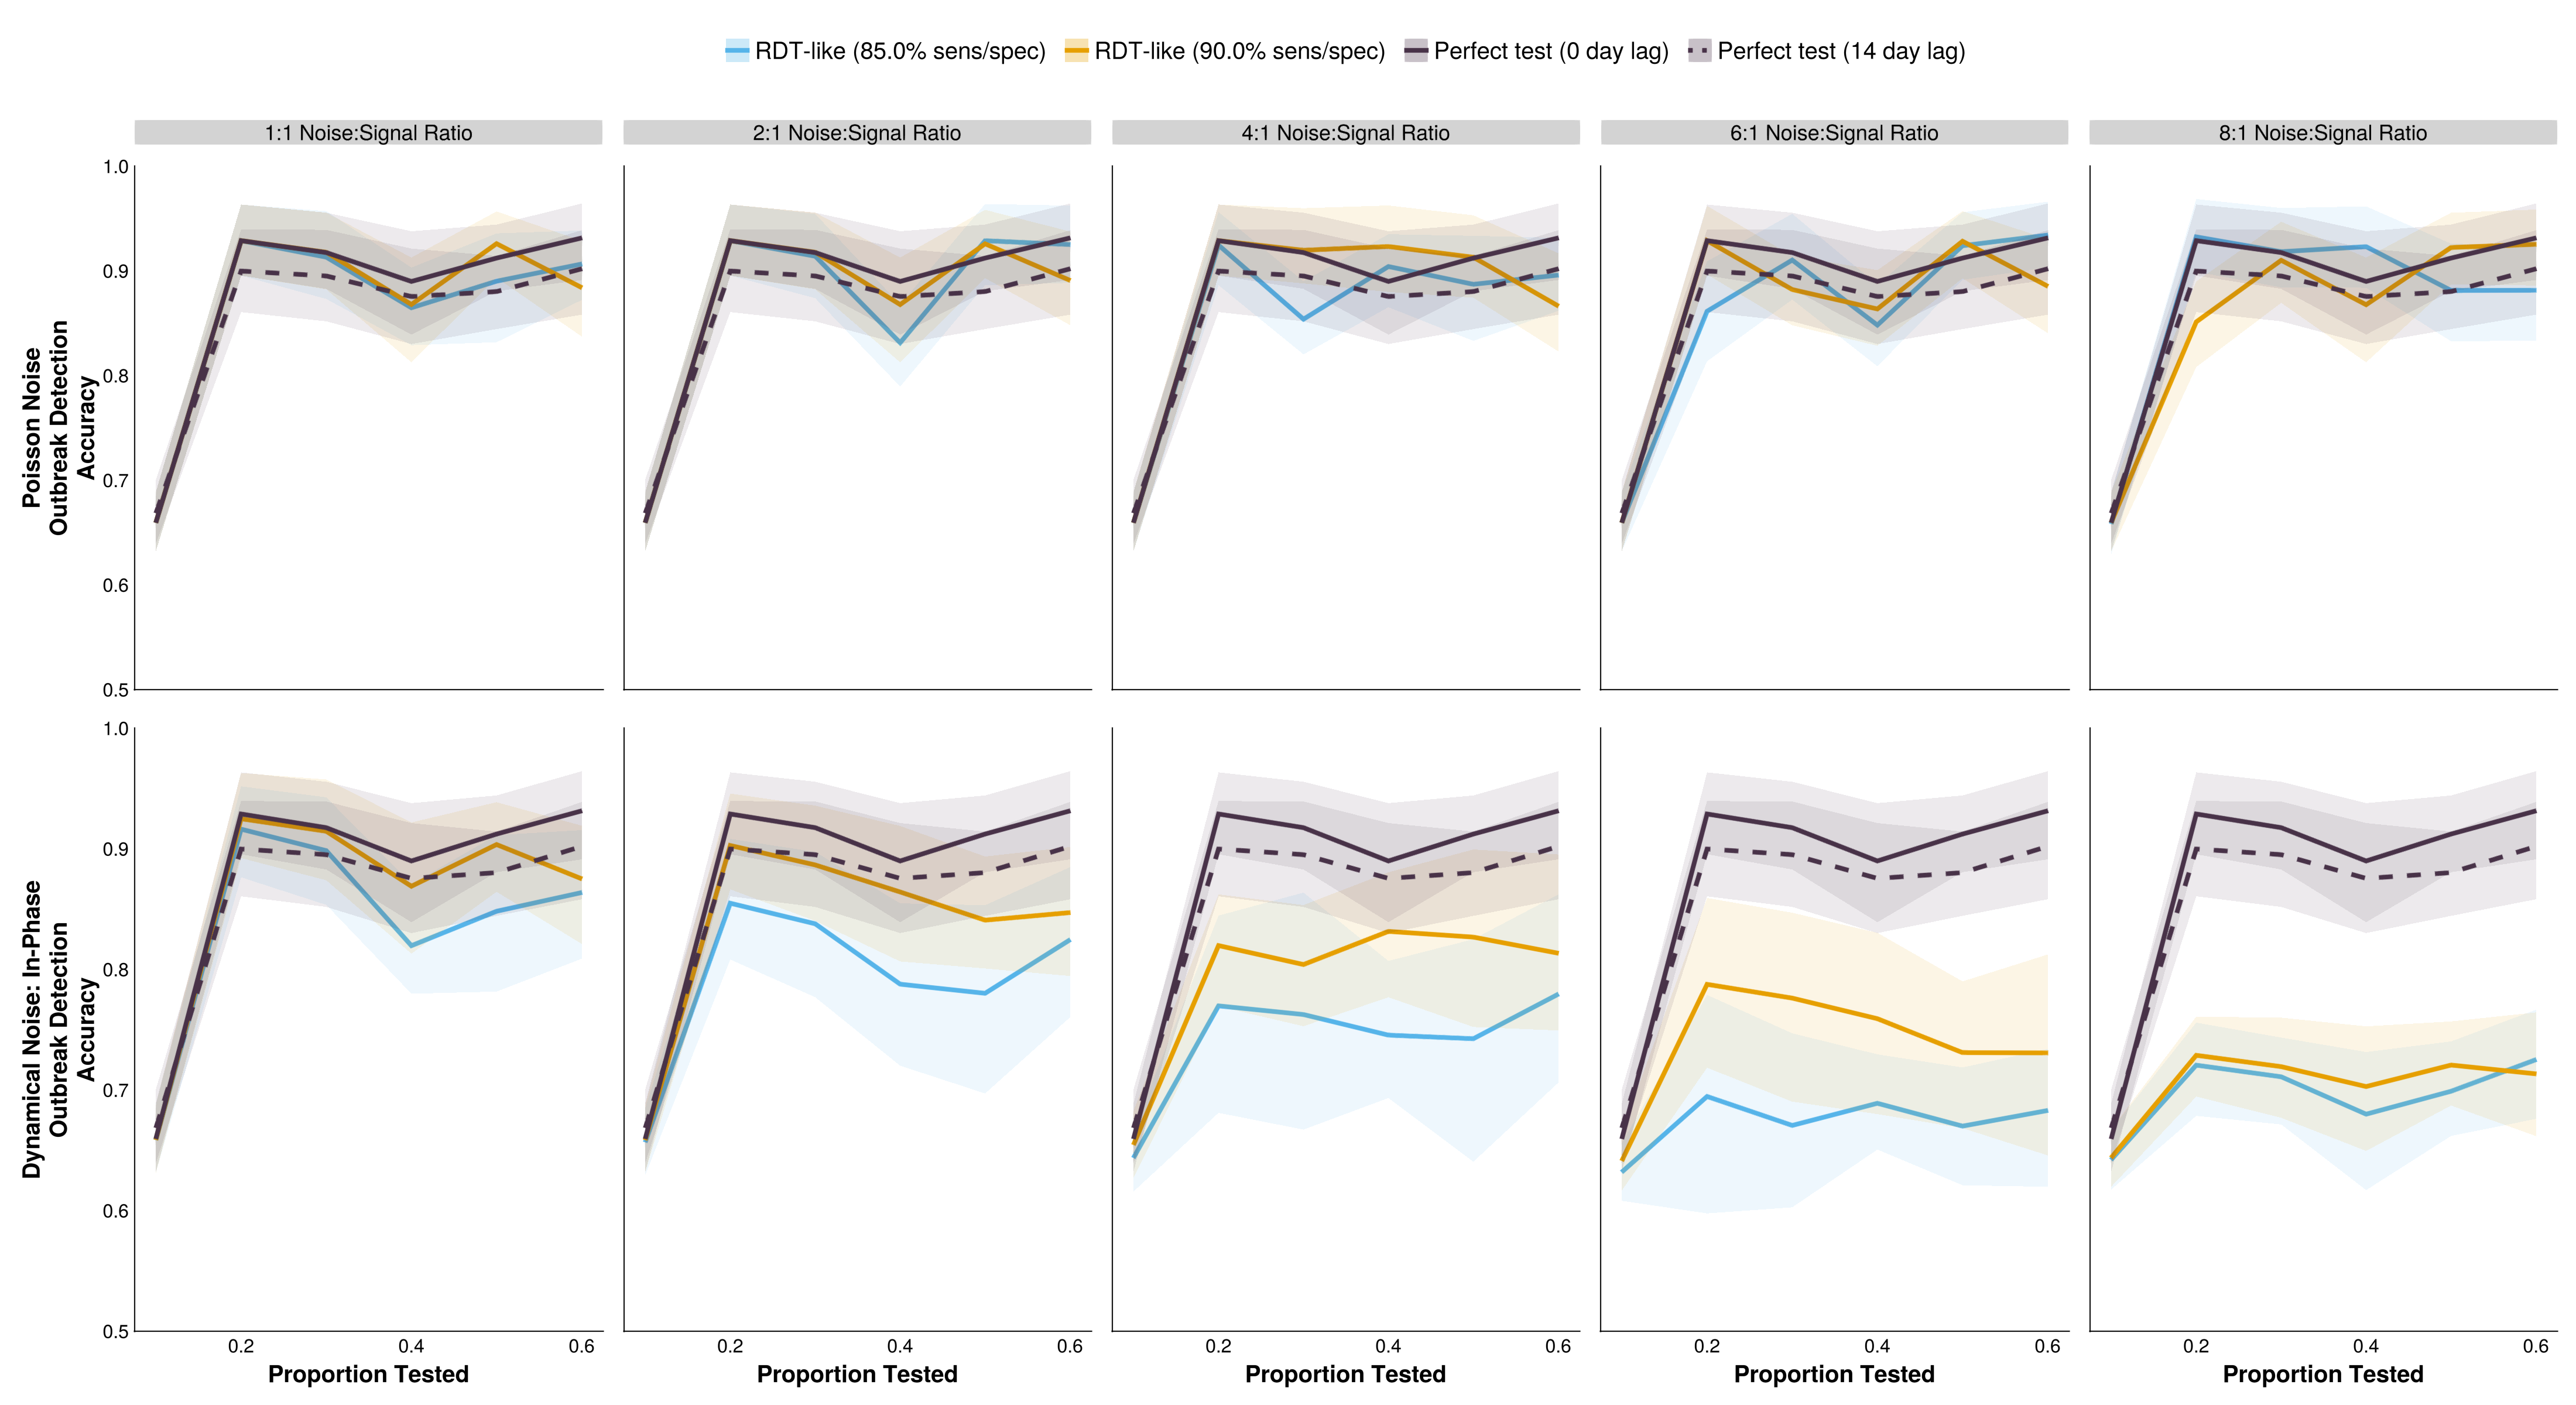

In [5]:
#| fig-cap: The accuracy of outbreak detection systems under different testing rates and noise structures. The shaded bands illustrate the 80% central interval, and the solid/dashed lines represent the mean estimate. Solid lines represent tests with 0-day turnaround times, and dashed lines represent tests with result delays.
#| label: fig-accuracy
line_plot(
    optimal_threshold_characteristics;
    outcome = :accuracy,
    ylabel = "Outbreak Detection\nAccuracy",
    alpha = 0.1,
    facet_fontsize = 18,
    labelsize = 20,
    show_x_facet_label = true,
    show_y_facet_label = false,
    ylims = (0.5, 1.0),
    force = true,
    plotdirpath = DrWatson.projectdir("manuscript"),
    plotname = "line_accuracy_plot",
    save_plot = true,
    clinical_hline = clinical_hline,
    nbanks = nbanks,
    legend_rowsize = legend_rowsize,
)

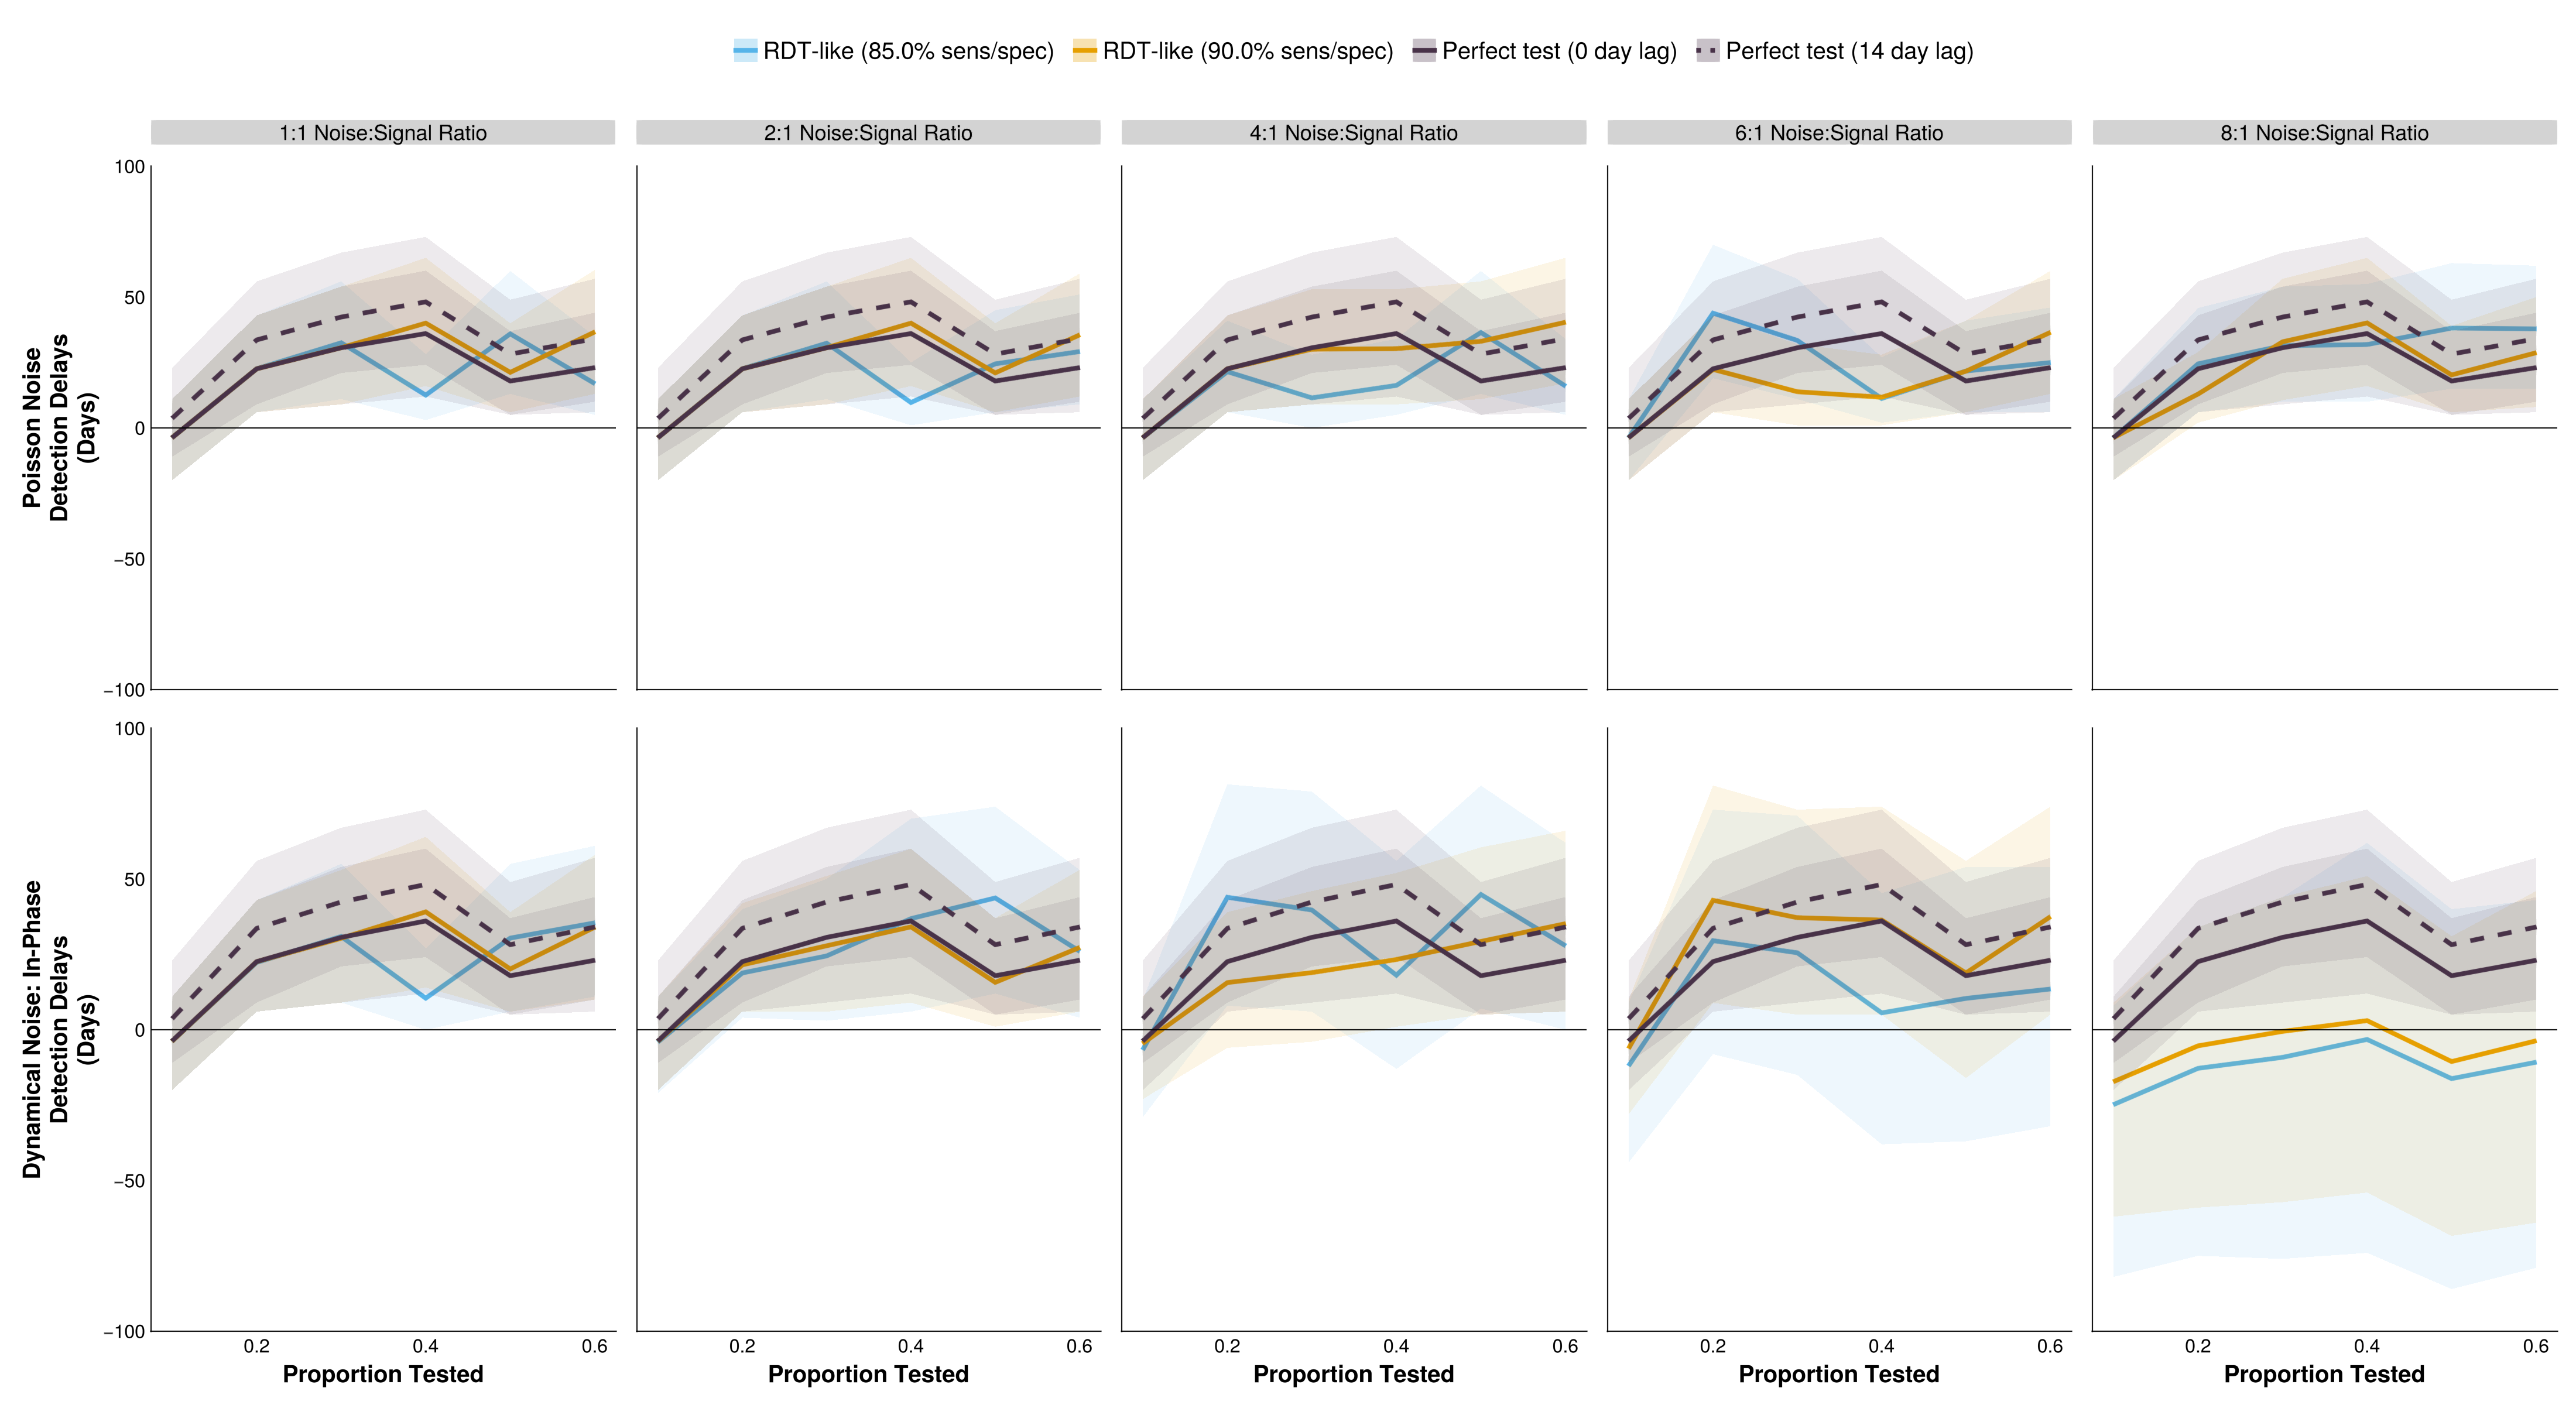

In [6]:
#| fig-cap: The detection delay of outbreak detection systems under different testing rates and noise structures. The shaded bands illustrate the 80% central interval, and the solid/dashed lines represent the mean estimate. Solid lines represent tests with 0-day turnaround times, and dashed lines represent tests with result delays.
#| label: fig-delay
line_plot(
    optimal_threshold_characteristics;
    outcome = :detectiondelays,
    ylabel = "Detection Delays\n(Days)",
    alpha = 0.1,
    hlines = (0.0),
    facet_fontsize = 18,
    labelsize = 20,
    show_x_facet_label = true,
    show_y_facet_label = false,
    ylims = (-100, 100),
    force = true,
    plotdirpath = DrWatson.projectdir("manuscript"),
    plotname = "line_delays_plot",
    save_plot = true,
    clinical_hline = clinical_hline,
    nbanks = nbanks,
    legend_rowsize = legend_rowsize,
)

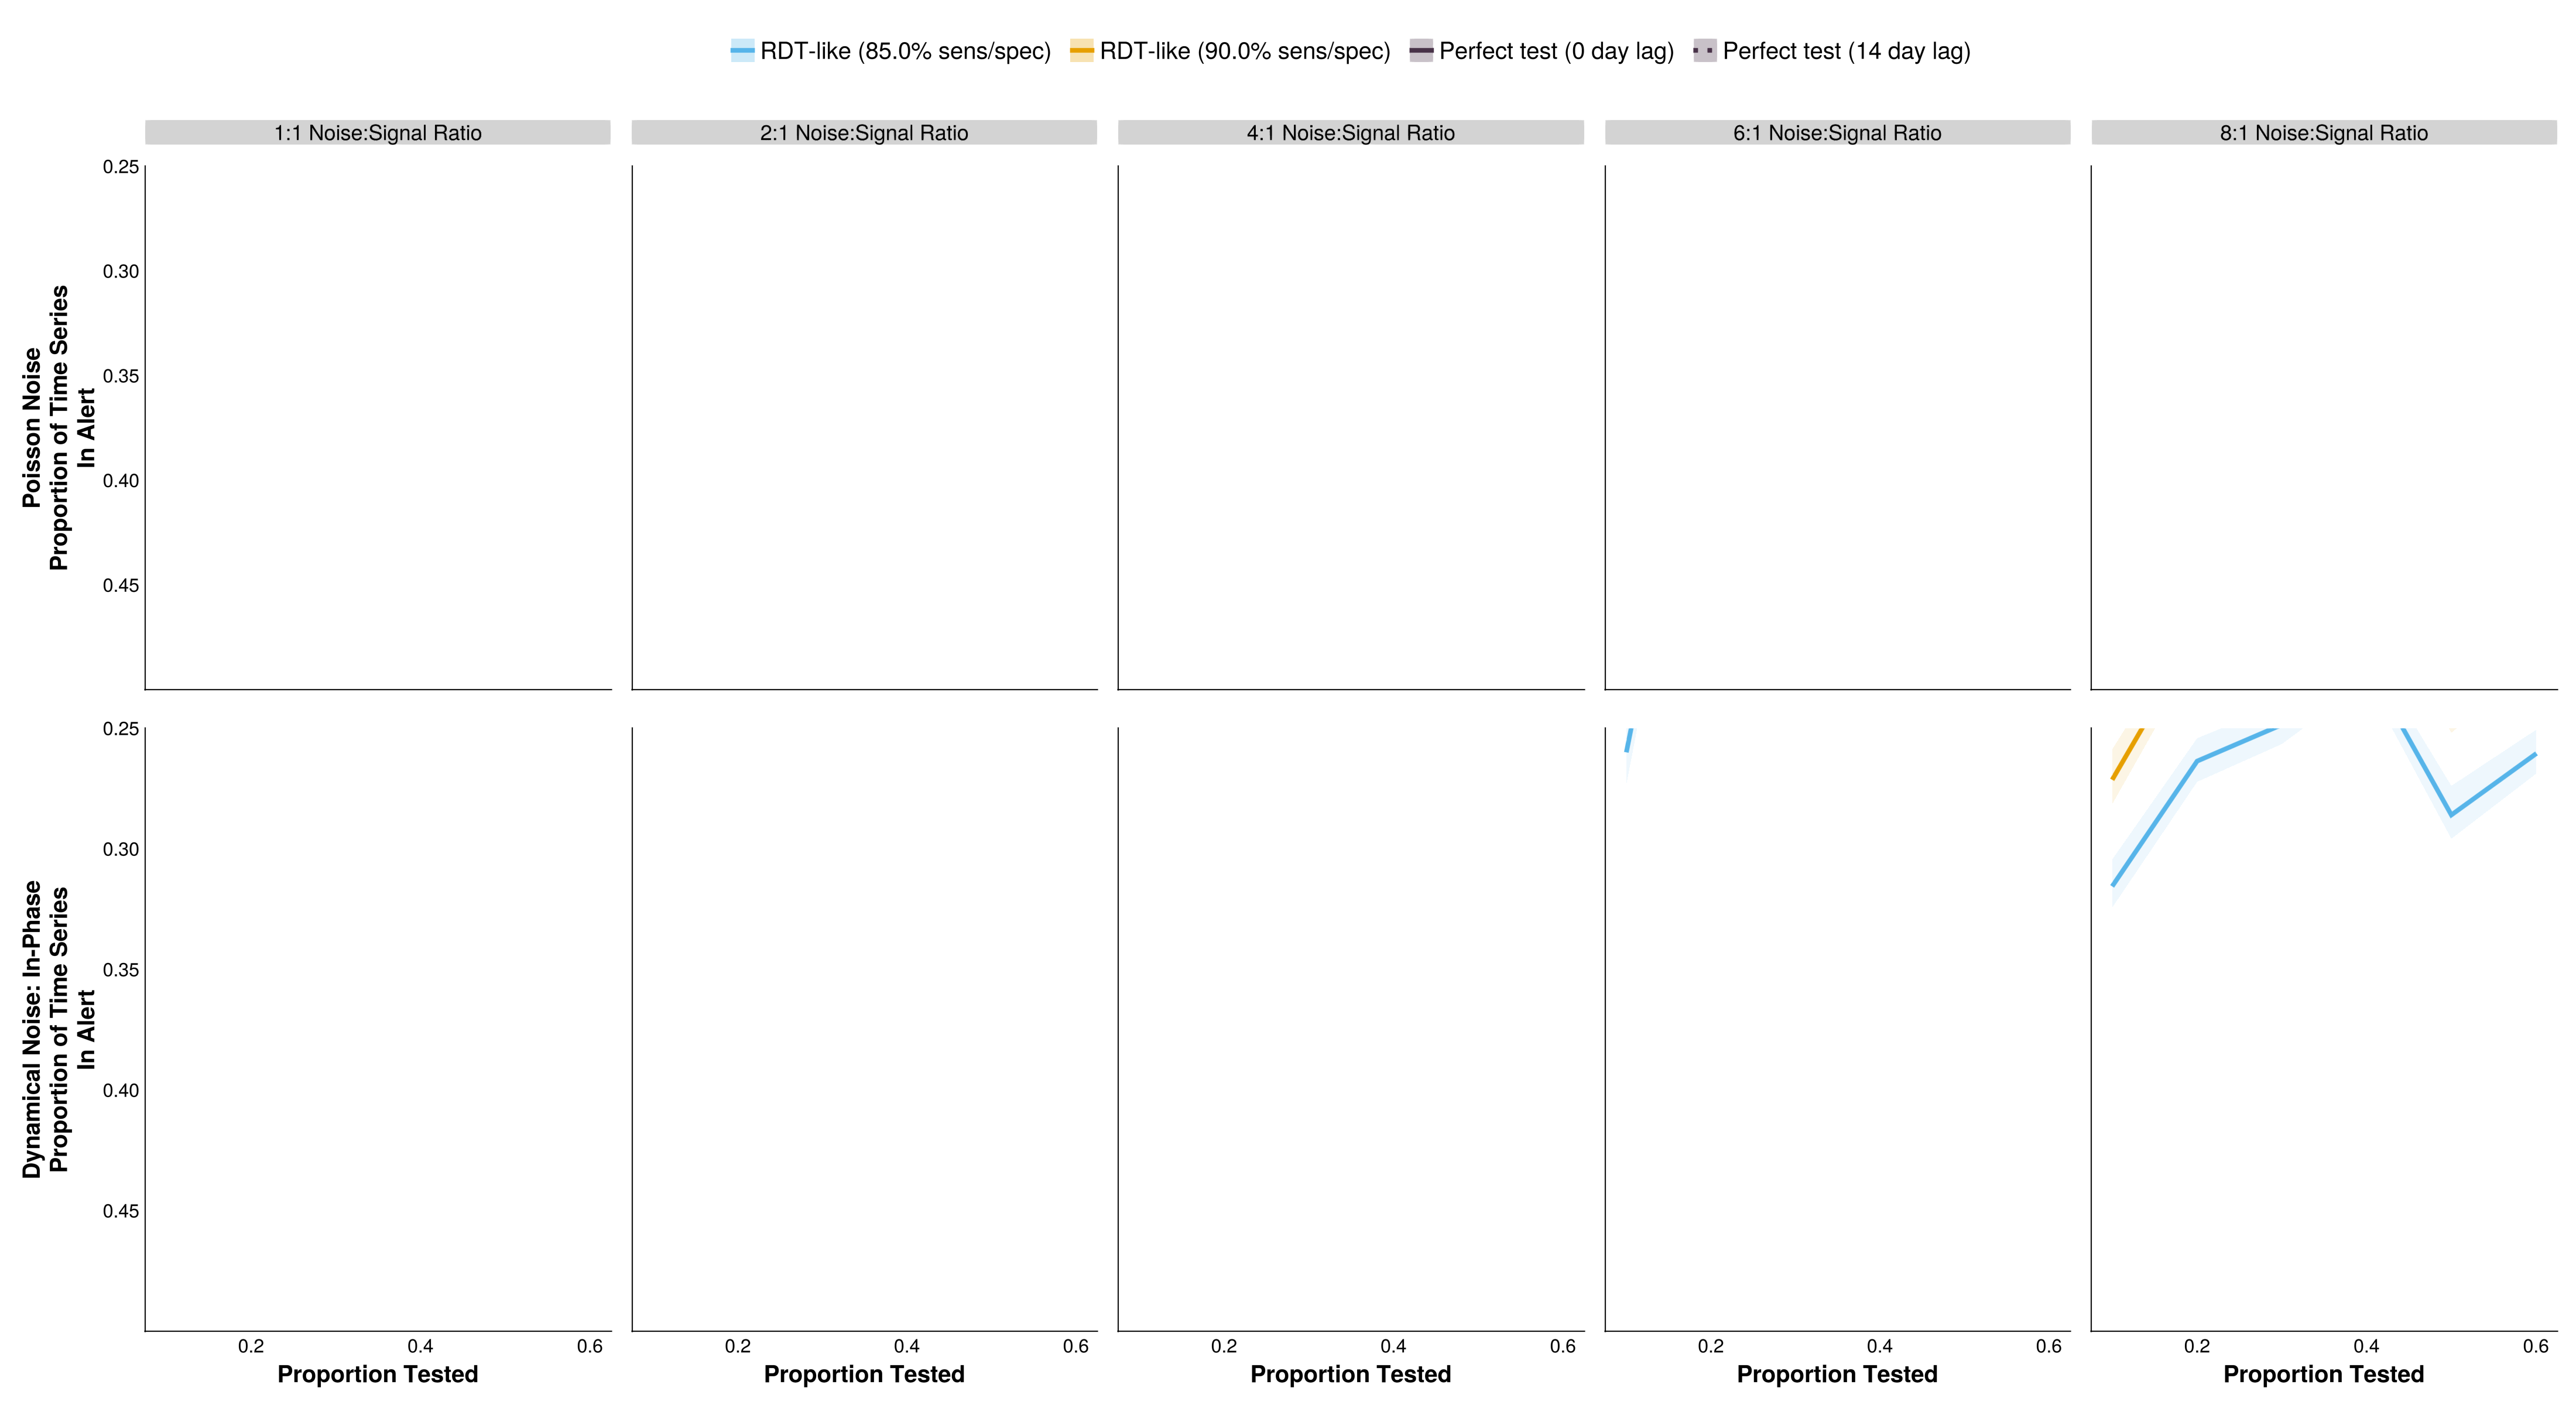

In [7]:
#| fig-cap: The difference between proportion of the time series in alert for outbreak detection systems under different testing rates and noise structures. The shaded bands illustrate the 80% central interval, and the solid/dashed lines represent the mean estimate. Solid lines represent tests with 0-day turnaround times, and dashed lines represent tests with result delays.
#| label: fig-alert-proportion
line_plot(
    optimal_threshold_characteristics;
    outcome = :proportion_timeseries_in_alert,
    ylabel = "Proportion of Time Series\nIn Alert",
    alpha = 0.1,
    hlines = (0.0),
    facet_fontsize = 18,
    labelsize = 20,
    show_x_facet_label = true,
    show_y_facet_label = false,
    ylims = (0.5, 0.25),
    force = true,
    plotdirpath = DrWatson.projectdir("manuscript"),
    plotname = "line_prop_alert_plot",
    save_plot = true,
    clinical_hline = clinical_hline,
    nbanks = nbanks,
    legend_rowsize = legend_rowsize,
)

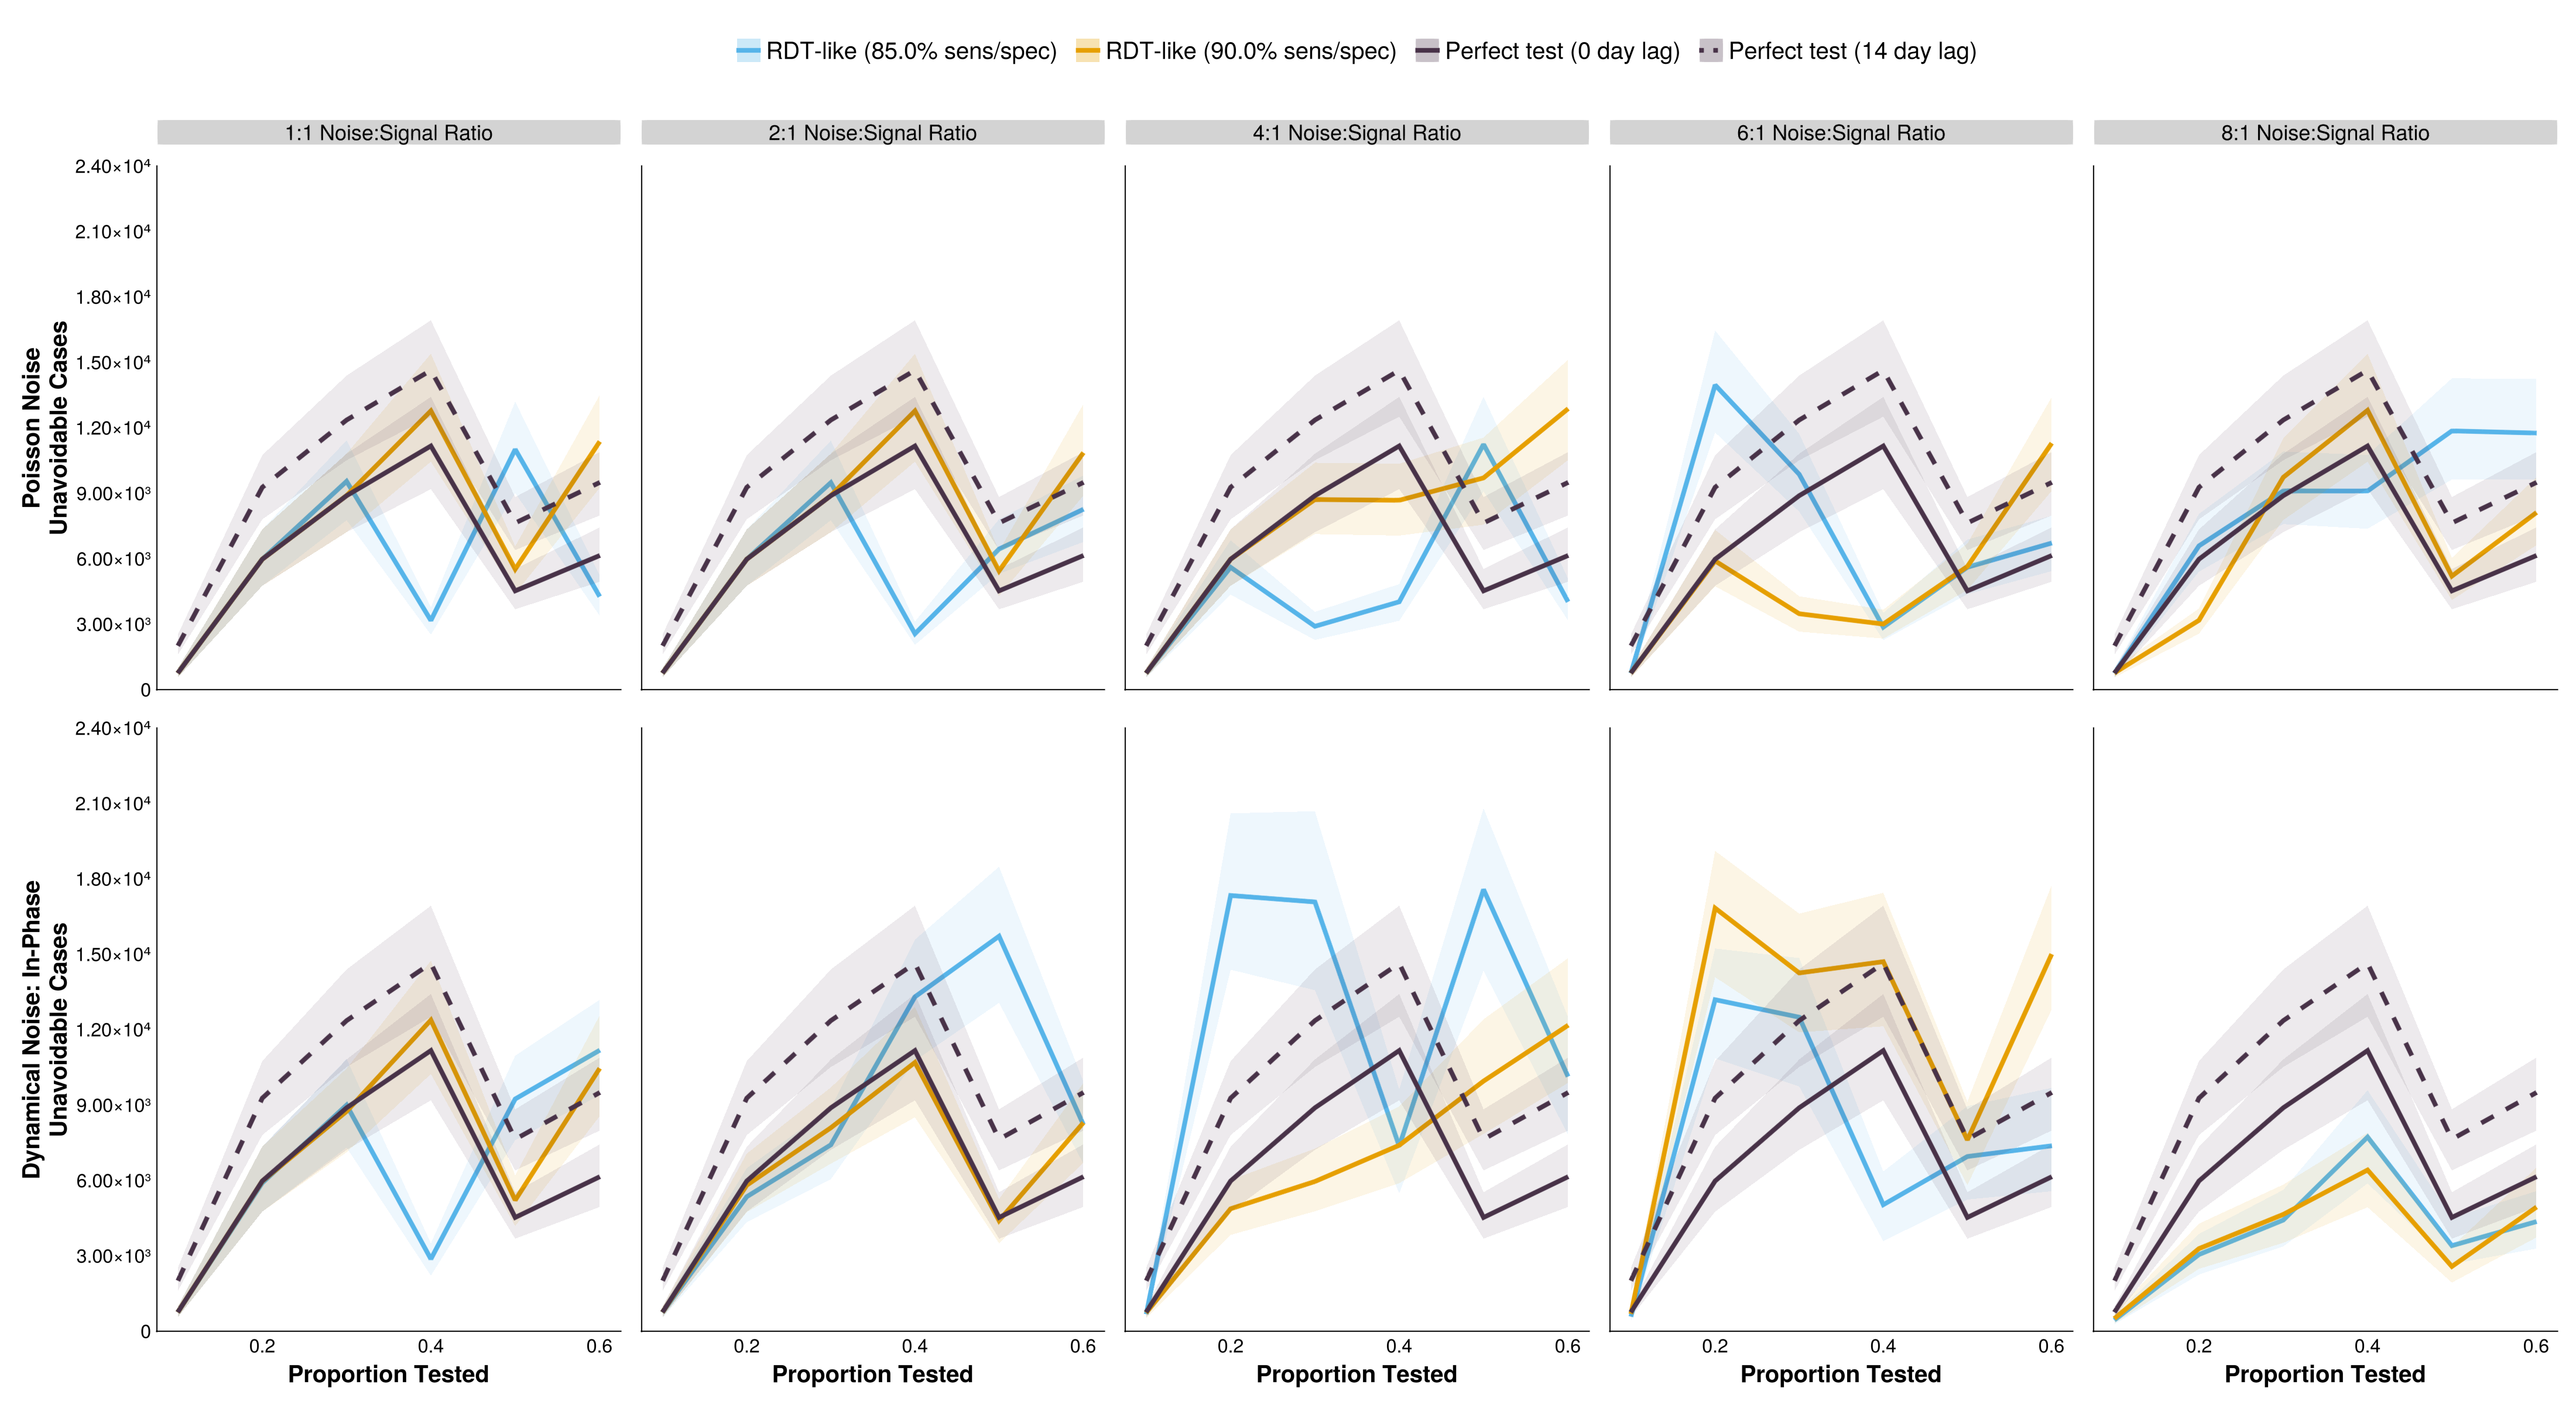

In [8]:
#| fig-cap: The number of unavoidable cases of outbreak detection systems under different testing rates and noise structures. The shaded bands illustrate the 80% central interval, and the solid/dashed lines represent the mean estimate. Solid lines represent tests with 0-day turnaround times, and dashed lines represent tests with result delays.
#| label: fig-unavoidable
line_plot(
    optimal_threshold_characteristics;
    outcome = :unavoidable_cases,
    ylabel = "Unavoidable Cases",
    alpha = 0.1,
    facet_fontsize = 18,
    labelsize = 20,
    show_x_facet_label = true,
    show_y_facet_label = false,
    ylims = (0, 2.4e4),
    force = true,
    plotdirpath = DrWatson.projectdir("manuscript"),
    plotname = "line_unavoidable_plot",
    save_plot = true,
    clinical_hline = clinical_hline,
    cases_scaling = gha_2022_scale_population_per_annum,
    nbanks = nbanks,
    legend_rowsize = legend_rowsize,
)